In [42]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Paired"))

In [3]:
data = pd.read_csv('../data/titanic.csv')
data.shape

(887, 8)

In [4]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


There does not seem to be any non-null data in the dataset.

| Variable  | Definition | Comment |
| ------------- | ------------- | ------- |
| Survived | Survival  | 0 = No, 1 = Yes |
| Pclass  | Ticket class  | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex     | Passenger gender | male, female |
| Age     | Passgenger age    | int64  |
| Siblings/Spouses Aboard | # of siblings / spouses aboard the Titanic | int64 |
| Parents/Children Aboard | # of parents / children aboard the Titanic | int64 |
| Fare    | Passenger Fare | float64 | 

In [6]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Variables at quick glance
- **Survived** : Approximately 25-50% of the passengers survived, need to analyze further.
- **Pclass** : Approximately 50-75% of the passengers bought 3rd class tickets for the journey.
- **Age** : Passgenger age varied from infants to the age of 80. The IQR is ~18 years, the central 50% of passengers were aged between 20 and 38 years.
- **Fare** : The minimum and maximum fare paid was 0 and 512 with the average being 32.3 and median of 14.5

In [8]:
data.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
221,0,3,Mr. George Henry Green,male,51.0,0,0,8.0500
299,1,3,Mr. Bernard McCoy,male,24.0,2,0,23.2500
324,0,3,Mr. Johan Hansen Nysveen,male,61.0,0,0,6.2375
727,0,3,Mr. Houssein G N Hassan,male,11.0,0,0,18.7875
460,0,2,Mr. Jacob Christian Milling,male,48.0,0,0,13.0000


# Counts of Some Categorical Variables

In [25]:
survived_counts = pd.DataFrame(data['Survived'].value_counts(normalize=True)*100).reset_index().round(3)
survived_counts.columns = ['Survived','Percentage']
survived_counts

,Survived,Percentage
0,0,61.443
1,1,38.557


In [47]:
sex_counts = pd.DataFrame((data['Sex'].value_counts(normalize=True)*100).sort_index()).reset_index().round(3)
sex_counts.columns = ['Sex','Percentage']
sex_counts

,Sex,Percentage
0,female,35.4
1,male,64.6


In [27]:
pclass_counts = pd.DataFrame((data['Pclass'].value_counts(normalize=True)*100).sort_index()).reset_index().round(3)
pclass_counts.columns = ['Pclass','Percentage']
pclass_counts

,Pclass,Percentage
0,1,24.352
1,2,20.744
2,3,54.904


Text(0.5, 1.0, 'Distribution of ticket class')

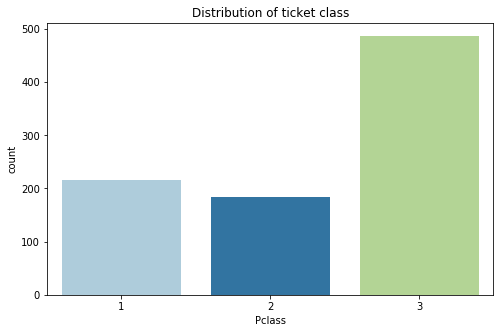

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Pclass', data = data)
plt.title('Distribution of ticket class')

In [32]:
first_class = data[data['Pclass'] == 1]
first_class.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,216.000000,216.0,216.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,38.788981,0.416667,0.356481,84.154687
std,0.484026,0.0,14.183633,0.611898,0.693997,78.380373
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,28.750000,0.000000,0.000000,30.923950
50%,1.000000,1.0,38.500000,0.000000,0.000000,60.287500
75%,1.000000,1.0,48.000000,1.000000,0.000000,93.500000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


In [33]:
third_class = data[data['Pclass'] == 3]
third_class.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,487.000000,487.0,487.000000,487.000000,487.000000,487.000000
mean,0.244353,3.0,25.188747,0.620123,0.396304,13.707707
std,0.430145,0.0,12.095084,1.379392,0.891793,11.817309
min,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.0,19.000000,0.000000,0.000000,7.750000
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,0.000000,3.0,31.000000,1.000000,0.000000,15.500000
max,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


# Differences in First & Third Class
- More than 50% of first class passengers survived while fewer than 25% sruvived from third class.
- Average fare paid for the two classes was 84 and 14.

# Survival Rates Based on Fare Paid Using `Pclass`

Text(0.5, 1.0, 'Survival counts as a function of Pclass')

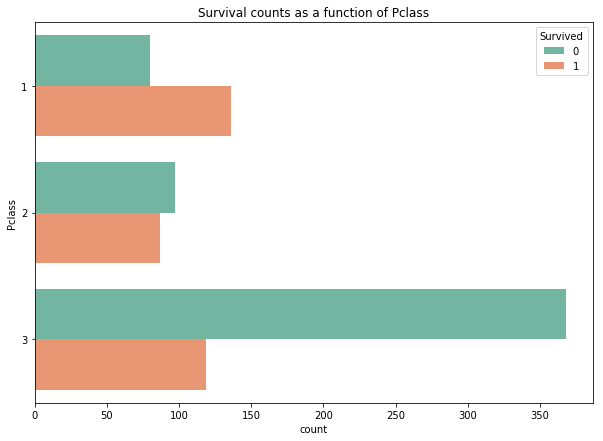

In [50]:
plt.figure(figsize=(10,7))
sns.countplot(y = 'Pclass', hue='Survived', data=data, palette=sns.color_palette("Set2"))
plt.title('Survival counts as a function of Pclass')